In [ ]:
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nikhileswarkomati/suicide-watch

Saving kaggle.json to kaggle.json
suicide-watch.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('suicide-watch.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
Suicide = pd.read_csv('Suicide_Detection.csv')
Suicide.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
Suicide = Suicide.drop('Unnamed: 0',axis=1)
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
Suicide['text'][10000]

'Why has everything to be so compicated So theres this girl and we vibe so good together its fucking awesome. After the last time we hung i fucking regret to not have just kissed her. Yea she has a bf but she told me im better looking and that He is a pussy (nigga why you still together then???). Now we didnt saw eachother for almost two months and everytime i want to hang she has something to do. Not a good sign ik but then she sends me hearts on snap an says we need to hang again that was a week ago than she left me on opened. After that she responded quickly to a new Message and even wrote me again the next day, now she kinda left me on read but i fucking know that that has nothing to mean cause its Always a Back and forth.Why cant she Just be straight If she dont wanna have contact with me anymore say it ofc it would hurt but i want to know what is going on. We would make a fukin Happy Couple If she Readin this \nI Love you you fucking Idiot.'

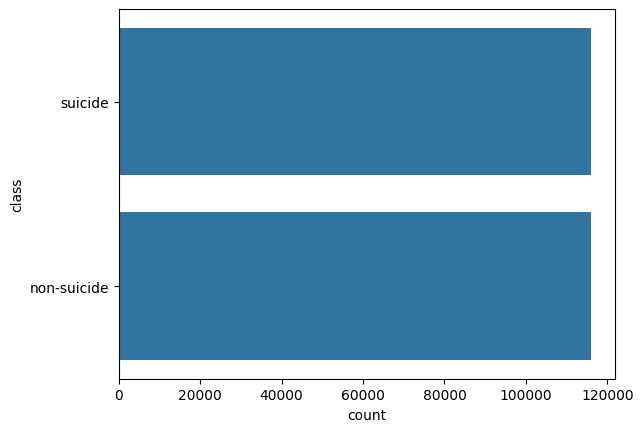

In [ ]:
sns.countplot(Suicide['class'])
plt.show()

In [ ]:
Suicide['Length'] = Suicide['text'].apply(lambda x: len(x.split(' ')))
Suicide['Length'].describe()
Suicide.head()

,text,class,Length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
3,i need helpjust help me im crying so hard,suicide,9
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,436


In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Suicide['Length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
86.0
126.0
190.0
317.0


In [ ]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Suicide['Length'].quantile(i))

339.0
363.0
393.0
427.0
470.0
526.0
604.0
721.0
960.0


Cutting off the post length at 317 words.

In [ ]:
Suicide = Suicide[Suicide.Length<=317]
Suicide.describe()

,Length
count,208955.000000
mean,79.867445
std,74.418093
min,1.000000
25%,24.000000
50%,50.000000
75%,115.000000
max,317.000000


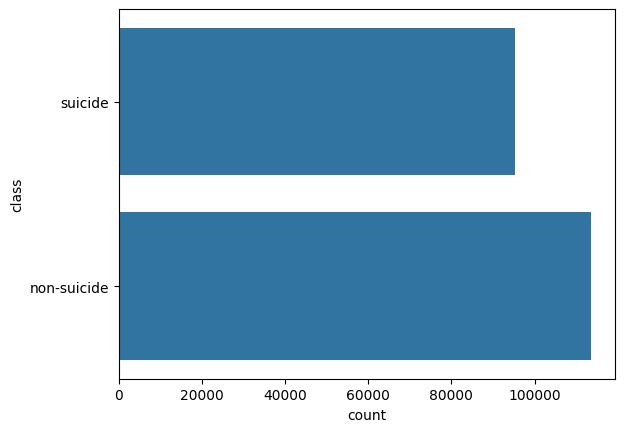

In [ ]:
sns.countplot(Suicide['class'])
plt.show()

In [ ]:
len(Suicide)

208955

As we can see we still get a good distribution of the target class.

In [ ]:
Words = list()
for i in Suicide['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

16688702

In [ ]:
Words

['EX',
 'WIFE',
 'THREATENING',
 'SUICIDERECENTLY',
 'I',
 'LEFT',
 'MY',
 'WIFE',
 'FOR',
 'GOOD',
 'BECAUSE',
 'SHE',
 'HAS',
 'CHEATED',
 'ON',
 'ME',
 'TWICE',
 'AND',
 'LIED',
 'TO',
 'ME',
 'SO',
 'MUCH',
 'THAT',
 'I',
 'HAVE',
 'DECIDED',
 'TO',
 'REFUSE',
 'TO',
 'GO',
 'BACK',
 'TO',
 'HER.',
 'AS',
 'OF',
 'A',
 'FEW',
 'DAYS',
 'AGO,',
 'SHE',
 'BEGAN',
 'THREATENING',
 'SUICIDE.',
 'I',
 'HAVE',
 'TIRELESSLY',
 'SPENT',
 'THESE',
 'PAAT',
 'FEW',
 'DAYS',
 'TALKING',
 'HER',
 'OUT',
 'OF',
 'IT',
 'AND',
 'SHE',
 'KEEPS',
 'HESITATING',
 'BECAUSE',
 'SHE',
 'WANTS',
 'TO',
 'BELIEVE',
 "I'LL",
 'COME',
 'BACK.',
 'I',
 'KNOW',
 'A',
 'LOT',
 'OF',
 'PEOPLE',
 'WILL',
 'THREATEN',
 'THIS',
 'IN',
 'ORDER',
 'TO',
 'GET',
 'THEIR',
 'WAY,',
 'BUT',
 'WHAT',
 'HAPPENS',
 'IF',
 'SHE',
 'REALLY',
 'DOES?',
 'WHAT',
 'DO',
 'I',
 'DO',
 'AND',
 'HOW',
 'AM',
 'I',
 'SUPPOSED',
 'TO',
 'HANDLE',
 'HER',
 'DEATH',
 'ON',
 'MY',
 'HANDS?',
 'I',
 'STILL',
 'LOVE',
 'MY',
 'WIFE',


In [ ]:
from collections import Counter

In [ ]:
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)

,Word,Frequency
4,I,890895
18,TO,558762
16,AND,464789
90,THE,350903
30,A,339305
...,...,...
404,CAN'T,35968
296,HAD,35618
460,DON’T,35336
1328,I'VE,35261


In [ ]:
len(Words_Freq)

428444

In [ ]:
Words_Freq['Frequency'].describe()

count    428444.000000
mean         38.951886
std        2288.110751
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      890895.000000
Name: Frequency, dtype: float64

In [ ]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

228.0
270.0
325.8989999999758
406.0
528.0
709.0
1035.0
1825.0
4104.140000000596


Cutting off the words frequency at above 99 quantile and below 31905

In [ ]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)

4281

In [ ]:
Words_Freq['Frequency'].describe()

count      4281.000000
mean       3504.923616
std       22625.909153
min         195.000000
25%         294.000000
50%         528.000000
75%        1378.000000
max      890895.000000
Name: Frequency, dtype: float64

In [ ]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.tail()

,Word,Frequency
5287,"ALCOHOL,",195
14495,PP,195
23786,TITLE.,195
1698,IMPORTANT.,195
4385,GRANDFATHER,195


In [ ]:
len(Words_Freq)

4202

We have to reduce the number of words for processing capacity.

In [ ]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

19803.076999999972
20529.751999999964
21670.046999999926
22609.074000000095
24278.224999999984
25391.77599999999
26753.605999999985
27639.58599999999
29412.64000000032


In [ ]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 3615.8130000000237]
Words_Freq.tail()

,Word,Frequency
71,SUPPOSED,3718
117,HEAR,3711
2096,FRIENDS.,3684
3339,MOTHER,3668
2387,LOVED,3617


In [ ]:
len(Words_Freq)

380

In [ ]:
print(Words_Freq['Word'])

726         SOME
145          ME.
3986      FILLER
1254          WE
11           HAS
          ...   
71      SUPPOSED
117         HEAR
2096    FRIENDS.
3339      MOTHER
2387       LOVED
Name: Word, Length: 380, dtype: object


We get a good list of words. However we might have to reduce this list further based on capacity.

We will create separate variables for each of these words based on their presence in the posts.

In [ ]:
# Final_Words = list(Words_Freq.Word)
# for i in Final_Words:
#     Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
# Suicide.drop('text',axis=1,inplace=True)
# Suicide.head()
# Suicide.to_csv('Suicide.csv', index=False)

In [ ]:
Suicide = pd.read_csv('Suicide.csv')

In [ ]:
Suicide['LEAST'].value_counts()

0    203642
1      5313
Name: LEAST, dtype: int64

In [ ]:
Suicide['class'] = Suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
Suicide.head()

,class,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
0,1,143,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,26,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,289,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

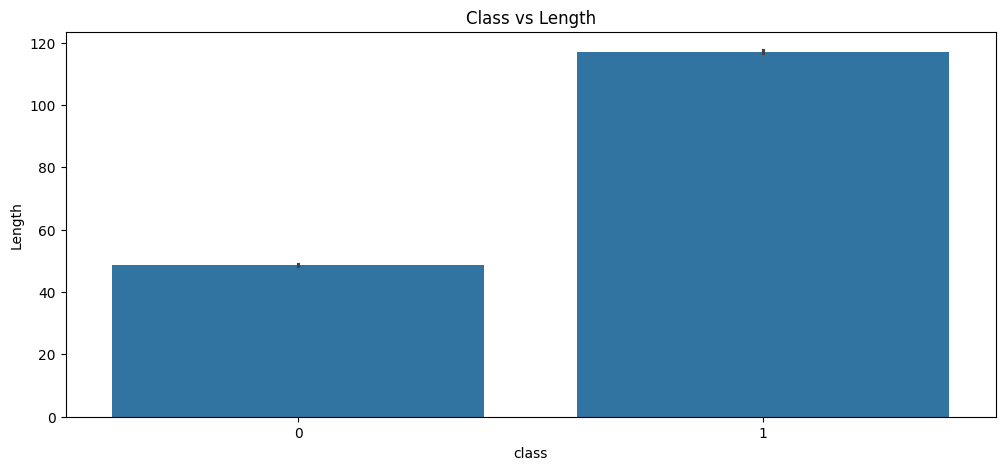

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='class',y='Length',data=Suicide)
plt.title('Class vs Length')
plt.show()

Since there are a still quite a lot of words we will check only the words with the highest correlation with the target variable.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
Correlations = dict()
var = list(Suicide.columns)
var.remove('class')
for i in var:
    Correlations[i] = pearsonr(Suicide[i],Suicide['class'])[0]
Correlations = pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})
Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations.head(10)

,Feature,Correlation
0,Length,0.458362
23,KILL,0.309071
2,ME.,0.279329
63,SUICIDE,0.271519
37,END,0.257212
73,ANYMORE.,0.247672
47,LIVE,0.228209
119,MYSELF.,0.222832
13,IT.,0.222543
132,SUICIDAL,0.219771


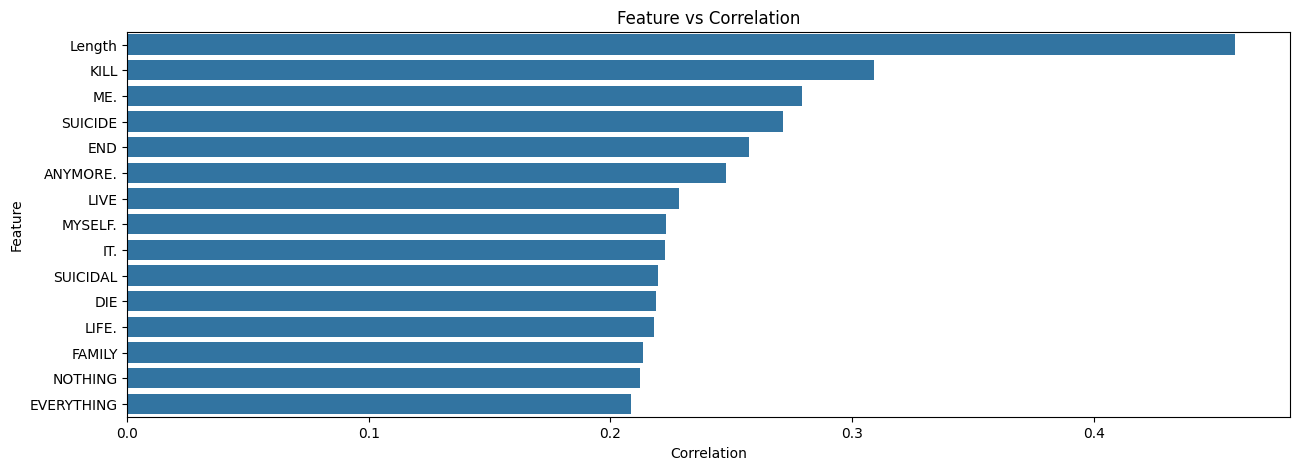

In [ ]:
temp = Correlations.head(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

As we can see the correlations are not high considering the non linear relationship between the variables.

In [ ]:
Correlations.tail(15)

,Feature,Correlation
106,WANNA,-0.029934
371,WEIRD,-0.031056
246,IDK,-0.032433
4,WE,-0.032647
230,US,-0.032701
344,CLASS,-0.047545
151,GIRL,-0.047838
281,REDDIT,-0.048870
270,KINDA,-0.054916
286,PLAY,-0.059581


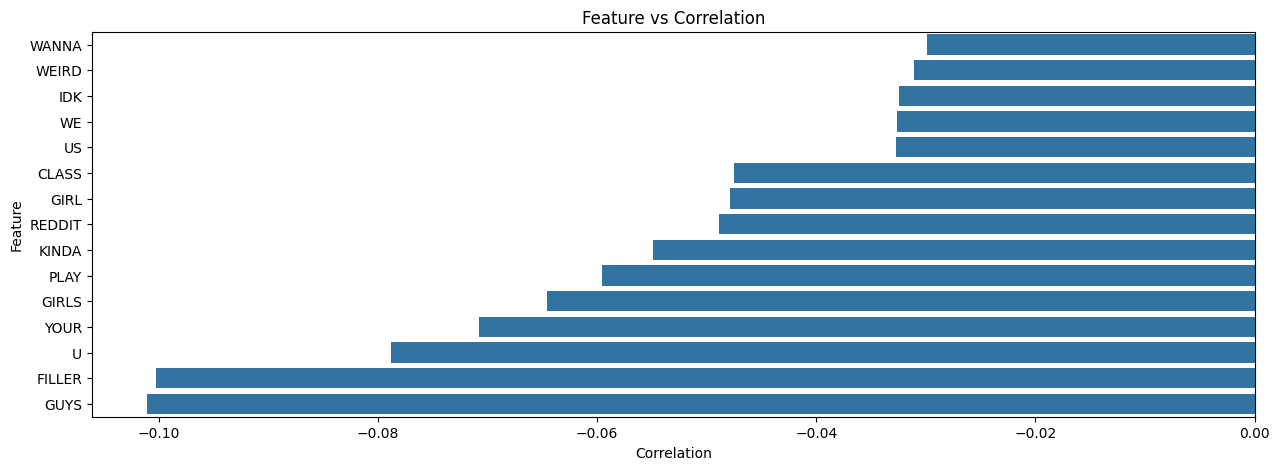

In [ ]:
temp = Correlations.tail(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

Here we get the highest negative correlations.

# Model building.

We will have to take a sample of the available data points since there are a lot of data points, more than I have the capacity
to handle.
We will do this by taking a sample of the data for training and using the rest for prediction.

Also since we are mostly interested in the words we will drop the variable 'Length' for now.

In [ ]:
Suicide_Pred = Suicide.drop('Length',axis=1)

In [ ]:
len(Suicide_Pred)

208955

In [ ]:
Suicide_Pred.head()

,class,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Suicide_Pred.drop('class',axis=1)
y = Suicide_Pred['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.1,random_state=100)
X_train.head()

,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,MORE,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
36016,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91566,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148520,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174056,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
len(X_train)

20895

Checking the class distirbution of the train set.

In [ ]:
y_train.value_counts()

0    11292
1     9603
Name: class, dtype: int64

In [ ]:
#As we can see we get a balanced data set.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
Model = RandomForestClassifier(random_state=100)

# params = {'n_estimators':[200],
#           'max_depth':[3,5,10,12,15,17,20],
#           'max_features':[0.1,0.15,0.2,0.25,0.3],
#           'criterion':['gini','entropy']}

# grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
# grid_search.fit(X_train,y_train)
# Model.fit(X_train, y_train)

In [ ]:
# Model_best = grid_search.best_estimator_

In [ ]:
# y_train_pred = Model.predict(X_train)
# y_test_pred = Model.predict(X_test)

# print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
# print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
# print('Train recall score :',recall_score(y_train,y_train_pred))
# print('Test recall score :',recall_score(y_test,y_test_pred))

In [ ]:
# Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
# Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
# Feature_Importance.set_index('Feature',inplace=True)
# Feature_Importance.head()

In [ ]:
# temp = Feature_Importance.head(20)
# plt.figure(figsize=(15,5))
# sns.barplot(x=temp.Importance,y=temp.index)
# plt.title('Features vs Importances')
# plt.show()

We can also obtain the words/variables with the lowest importances

In [ ]:
# temp = Feature_Importance.tail(20)
# plt.figure(figsize=(15,5))
# sns.barplot(x=temp.Importance,y=temp.index)
# plt.title('Features vs Importances')
# plt.show()

In [ ]:
#As we can see the model overfits the data slightly. However relative to the amount of data used for training and testing the
#model has performed well. We can improve the scores by further HP tuning.

In [ ]:
#Now we will include the Length variable as well in our model.

In [ ]:
X = Suicide.drop('class',axis=1)
y = Suicide['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=100)
X_train.head()

,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
199421,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142740,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27491,169,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101057,90,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
66960,83,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
Model = RandomForestClassifier(random_state=100)

# params = {'n_estimators':[200],
#           'max_depth':[3,5,10,12,15,17,20],
#           'max_features':[0.1,0.15,0.2,0.25,0.3],
#           'criterion':['gini','entropy']}

# grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
# grid_search.fit(X_train,y_train)
Model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
# Model_best = grid_search.best_estimator_

In [ ]:
y_train_pred = Model.predict(X_train)
y_test_pred = Model.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
print('Train recall score :',recall_score(y_train,y_train_pred))
print('Test recall score :',recall_score(y_test,y_test_pred))

Train accuracy score : 0.9958364041846531
Test accuracy score : 0.8666417810448133
Train recall score : 0.9917454065492028
Test recall score : 0.8500325513997102


In [ ]:
# Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
# Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
# Feature_Importance.set_index('Feature',inplace=True)
# Feature_Importance.head()

In [ ]:
# temp = Feature_Importance.head(20)
# plt.figure(figsize=(15,5))
# sns.barplot(x=temp.Importance,y=temp.index)
# plt.title('Features vs Importances')
# plt.show()

In [ ]:
# temp = Feature_Importance.tail(20)
# plt.figure(figsize=(15,5))
# sns.barplot(x=temp.Importance,y=temp.index)
# plt.title('Features vs Importances')
# plt.show()

In [ ]:
#Saving the Model to Disk
# import pickle
# filename = "finalized_model1.sav"
# pickle.dump(Model, open(filename, 'wb'))

,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
a,291,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# import pickle
# loaded_model = pickle.load(open(filename, 'rb'))
# df = df[['Length'] + Final_Words]

In [ ]:
# Model.fit(X_train, y_train)

,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
a,291,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tweet = "Why has everything to be sad, depressed so compicated So theres this girl and we vibe so good together its fucking awesome. After the last time we hung i fucking regret to not have just kissed her. Yea she has a bf but she told me im better looking and that He is a pussy (nigga why you still together then???). Now we didnt saw eachother for almost two months and everytime i want to hang she has something to do. Not a good sign ik but then she sends me hearts on snap an says we need to hang again that was a week ago than she left me on opened. After that she responded quickly to a new Message and even wrote me again the next day, now she kinda left me on read but i fucking know that that has nothing to mean cause its Always a Back and forth.Why cant she Just be straight If she dont wanna have contact with me anymore say it ofc it would hurt but i want to know what is going on. We would make a fukin Happy Couple If she Readin this \nI Love you you fucking Idiot."
length = len(tweet)
Final_Words = list(Words_Freq.Word)
df = pd.DataFrame(columns = Final_Words, index=['a'])
for i in Final_Words:
    if i in tweet.upper().split(' '):
        df.loc['a', i]=1
        # df.loc['a', 'Length'] = len(i)
    else:
        df.loc['a', i]=0

df['Length'] = length
length_column = df.pop('Length')
df.insert(0, 'Length', length_column)

Model.predict(df)
if(Model.predict(df)==1):
    print("Suicidal")
else:
    print("He is doing good!!")


He is doing good!!


In [ ]:
# print(Final_Words)